In [10]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# Add every font at the specified location
font_dir = ["fonts"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams["font.family"] = "umr10"
rcParams["font.size"] = 16

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap

In [12]:
airlines_connections_dataset = pd.read_csv("data/german_airline_connection_costs.csv")

In [13]:
graph = nx.from_pandas_edgelist(
    airlines_connections_dataset,
    source="Source",
    target="Target",
    edge_attr="Cost",
    create_using=nx.DiGraph(),
)

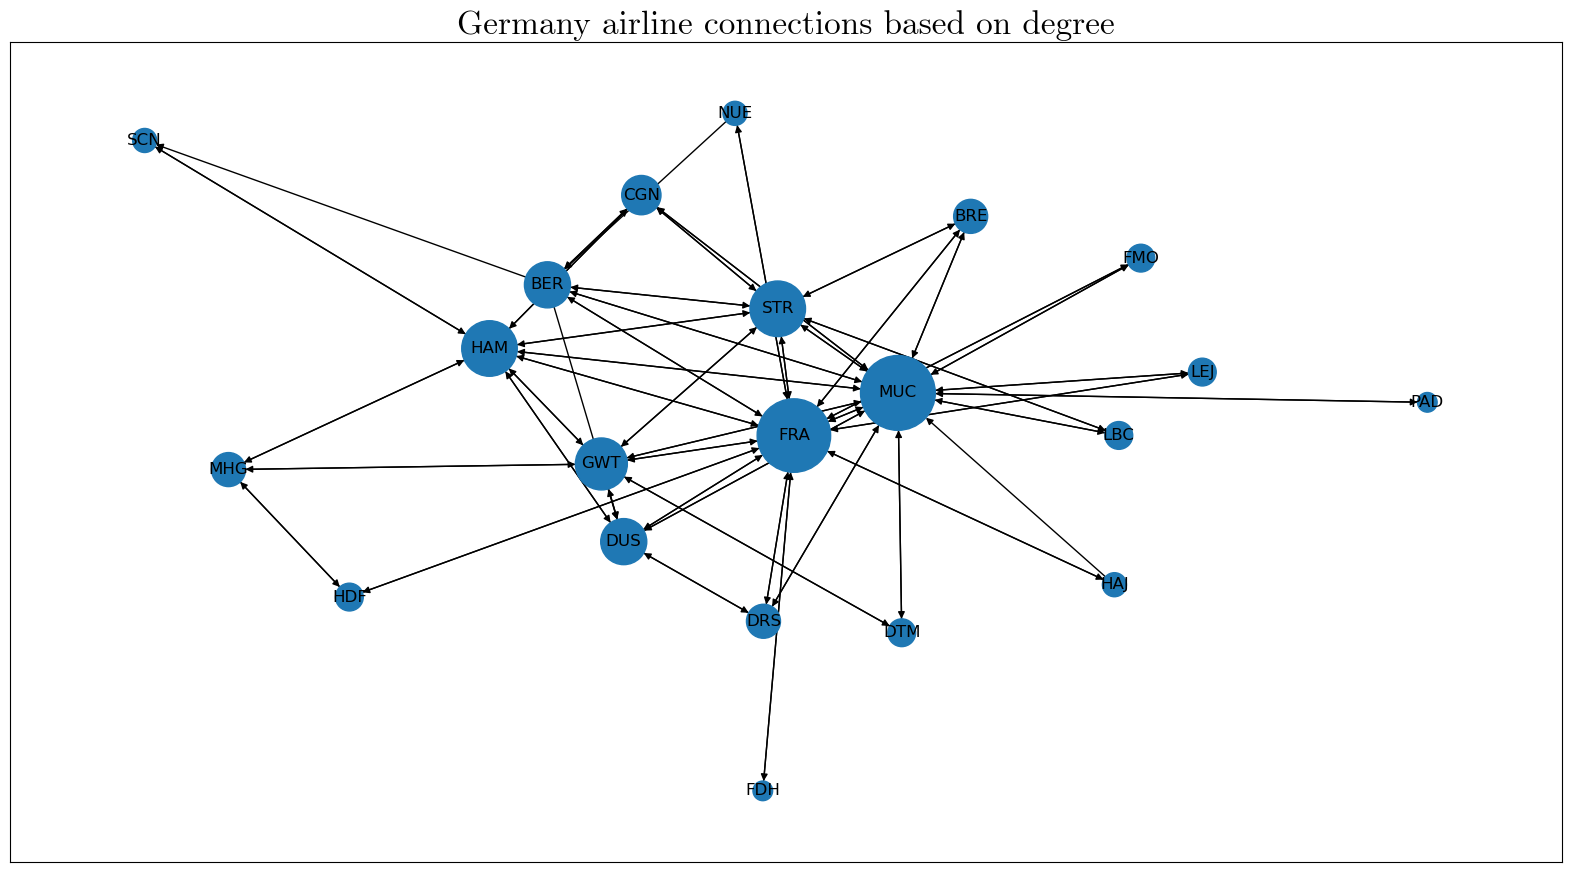

In [14]:
degrees = dict(nx.degree(graph))

plt.figure(figsize=(16, 9))
nx.draw_networkx(G=graph, node_size=[100 * value for value in degrees.values()])
plt.title("Germany airline connections based on degree", fontsize=24)
plt.tight_layout()
plt.savefig(
    "images/german_airline_connections_networkx_degree.png",
    bbox_inches="tight",
    dpi=400,
)

In [15]:
plt.figure(figsize=(9, 16))
germany_map = Basemap(
    projection="merc",
    llcrnrlon=4,
    llcrnrlat=47,
    urcrnrlon=16,
    urcrnrlat=56,
    lat_ts=0,
    resolution="f",
    suppress_ticks=True,
)

<Figure size 900x1600 with 0 Axes>

<Figure size 900x1600 with 0 Axes>

In [16]:
geo_location_dataset = pd.read_csv("data/geo_location.csv")
geo_location_dataset["Name"] = geo_location_dataset["Name"].apply(
    lambda x: x.split("(")[1][:-1]
)
geo_location_dataset.head()

Name   Latitude  Longitude
0  BER  52.366667  13.503333
1  BWE  52.319199  10.556100
2  BRE  53.047501   8.786670
3  CGN  50.865898   7.142740
4  DTM  51.518299   7.612240

Name   Latitude  Longitude
0  BER  52.366667  13.503333
1  BWE  52.319199  10.556100
2  BRE  53.047501   8.786670
3  CGN  50.865898   7.142740
4  DTM  51.518299   7.612240

In [17]:
mx, my = germany_map(
    geo_location_dataset["Longitude"].values, geo_location_dataset["Latitude"].values
)
pos = {}
for count, elem in enumerate(geo_location_dataset["Name"]):
    pos[elem] = (mx[count], my[count])

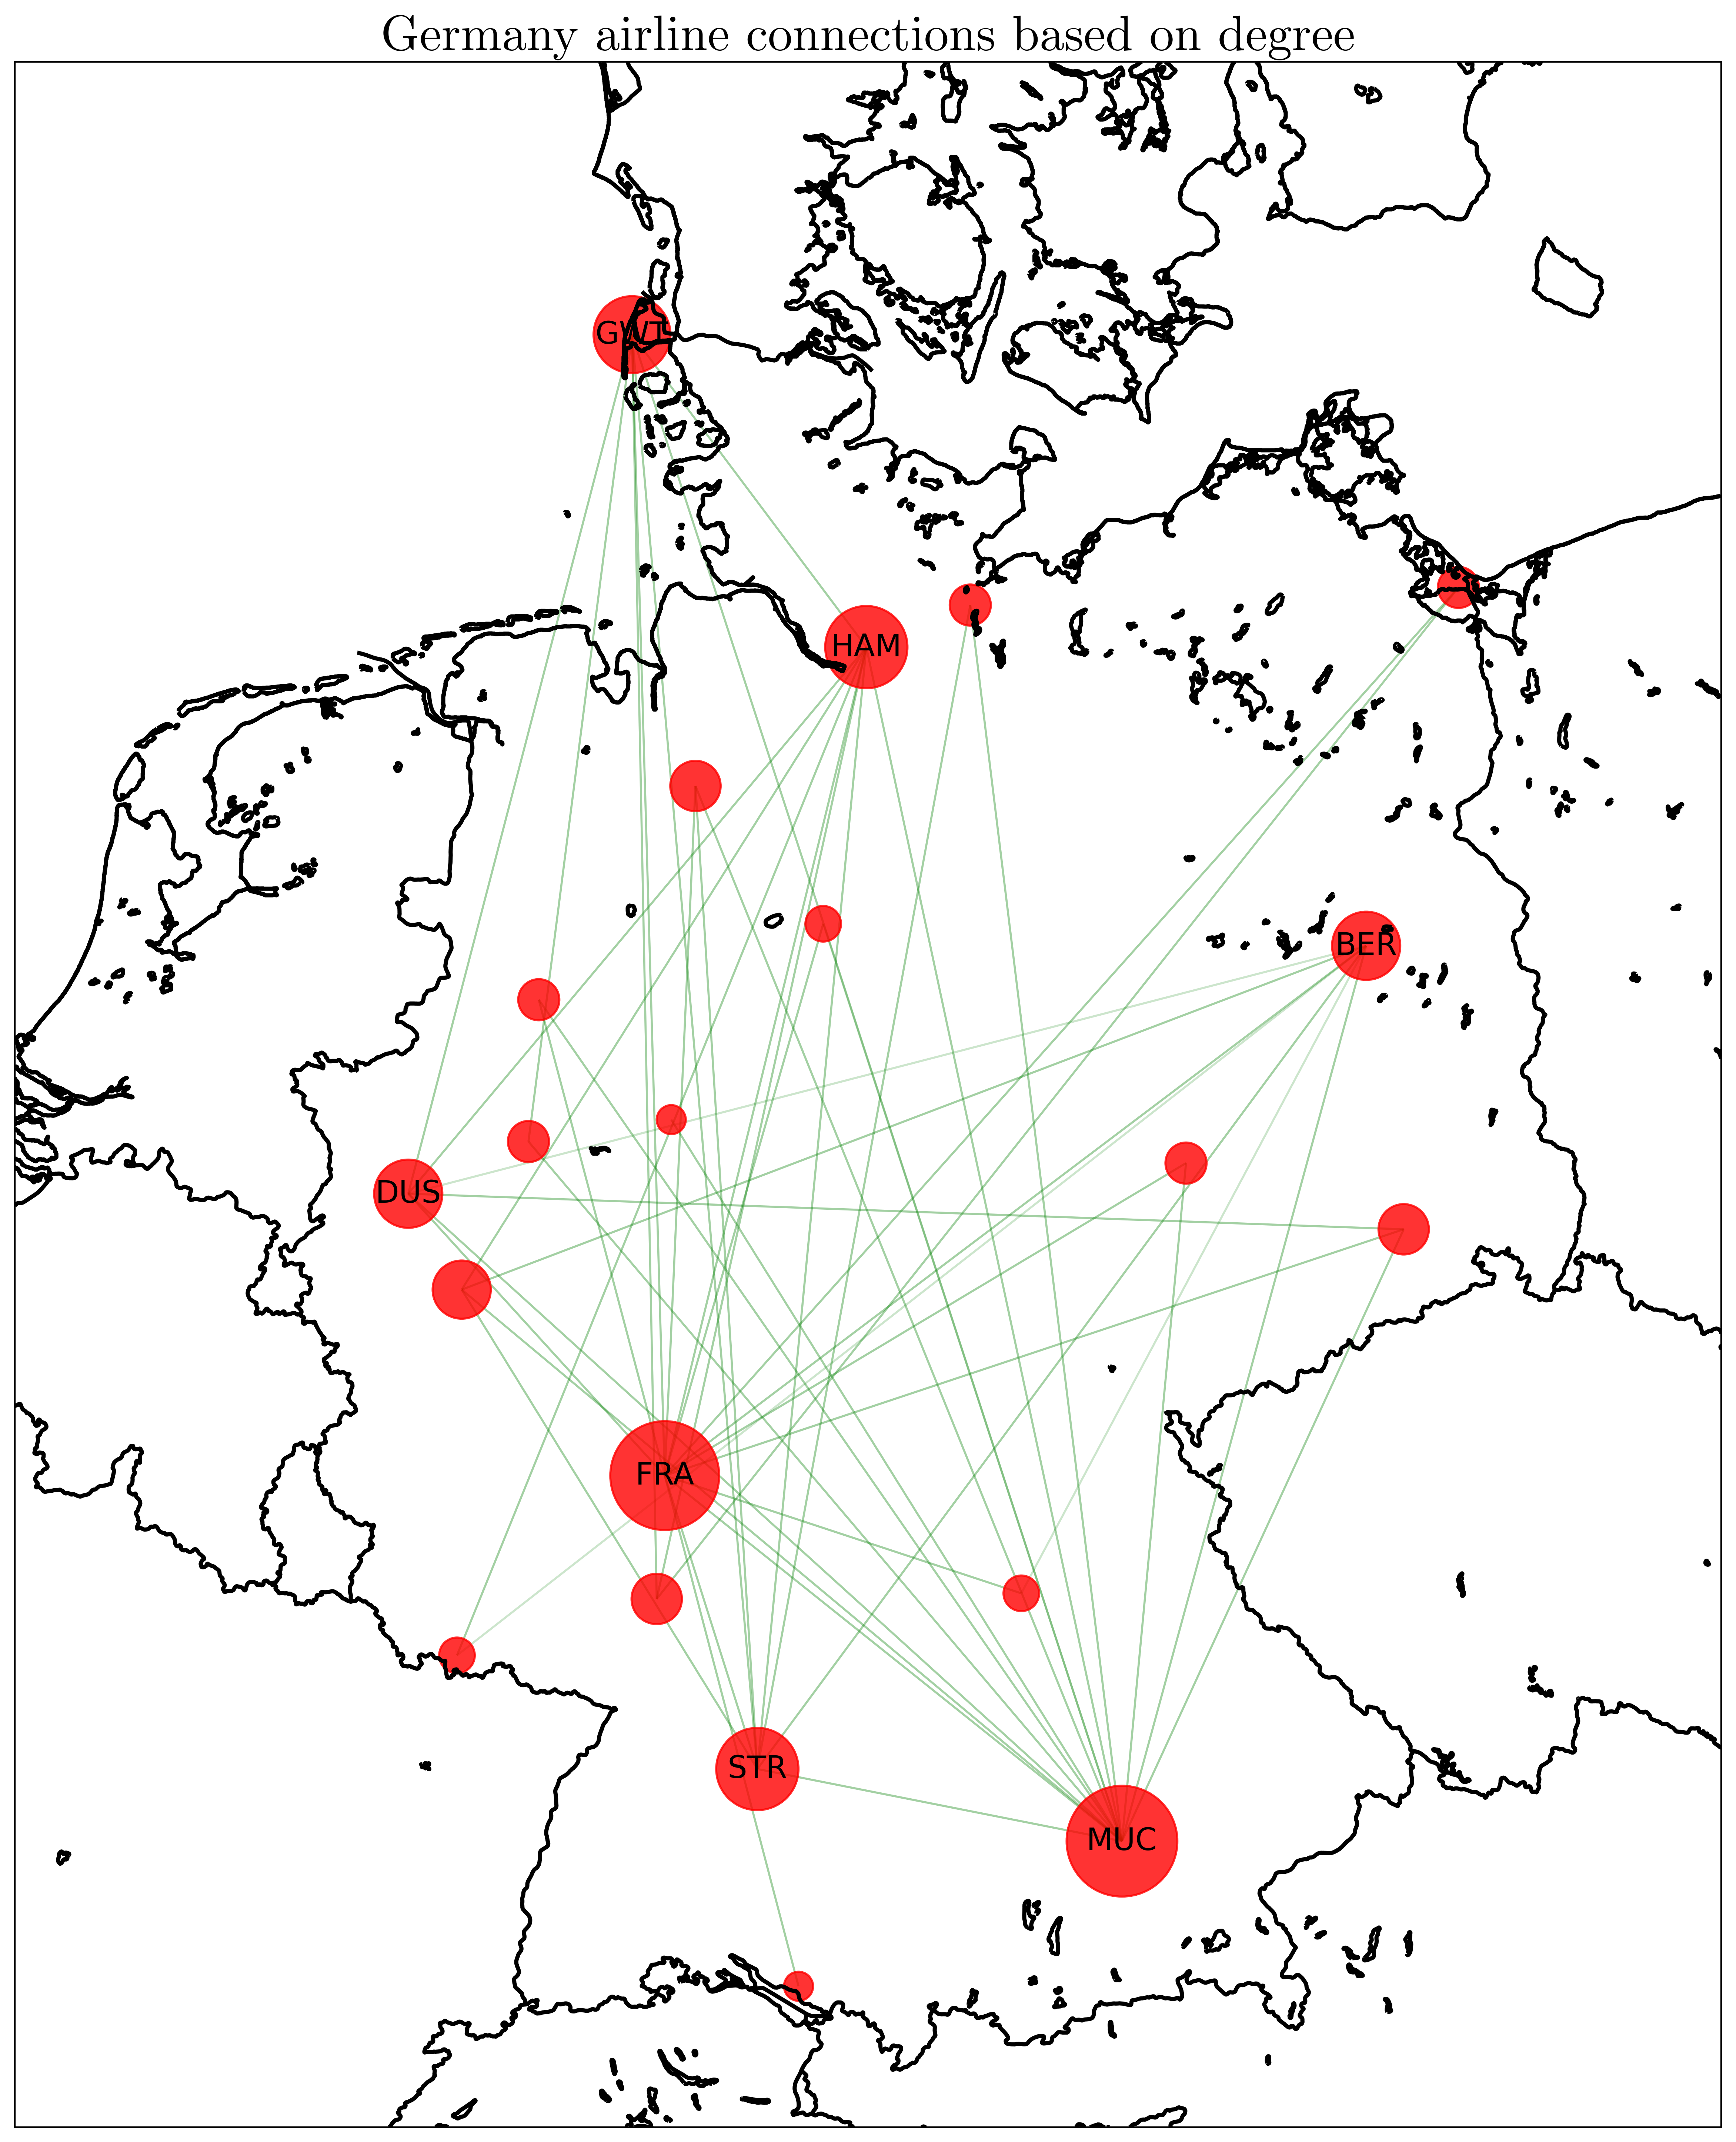

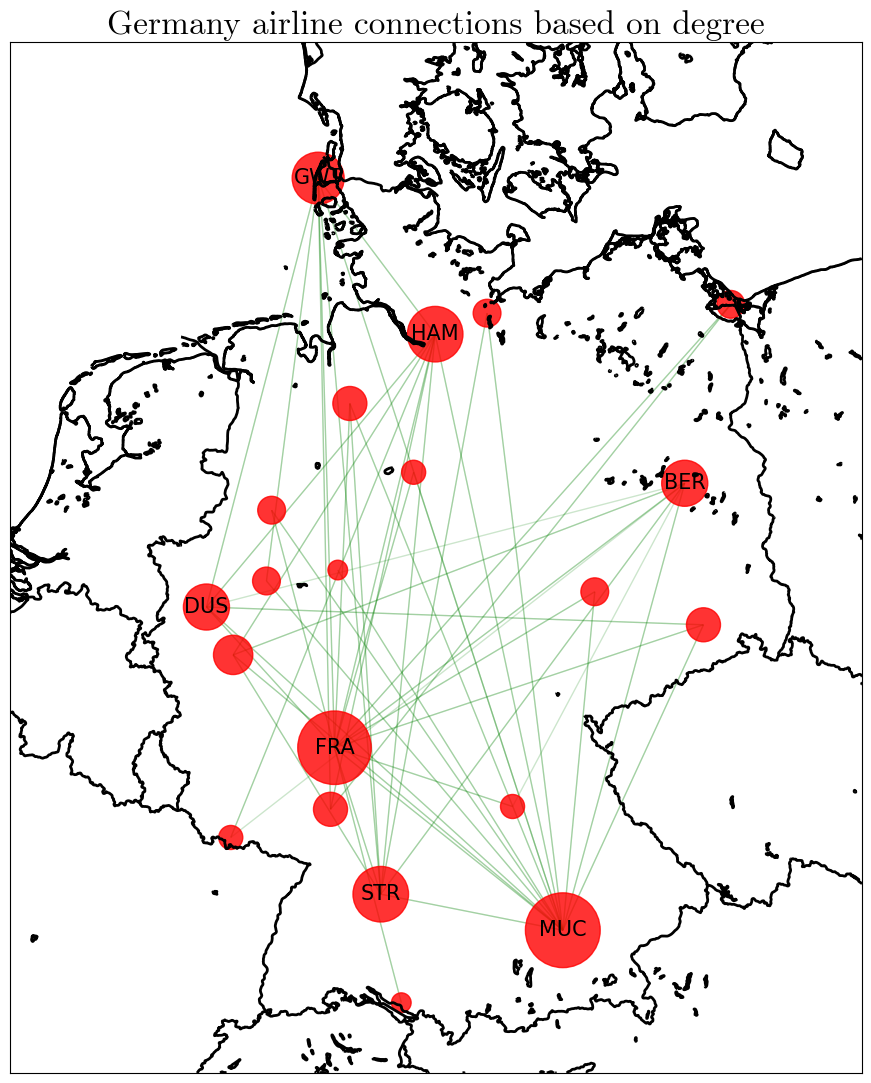

In [19]:
degrees = dict(nx.degree(graph))
plt.figure(figsize=(9, 16))
nx.draw_networkx_nodes(
    G=graph,
    pos=pos,
    nodelist=graph.nodes(),
    node_color="r",
    alpha=0.8,
    node_size=[100 * value for value in degrees.values()],
)
nx.draw_networkx_edges(G=graph, pos=pos, edge_color="g", alpha=0.2, arrows=False)
nx.draw_networkx_labels(
    G=graph,
    pos=pos,
    font_size=15,
    labels={x: x for x in graph.nodes() if degrees[x] >= 10},
)

germany_map.drawcountries(linewidth=2)
germany_map.drawstates(linewidth=0.2)
germany_map.drawcoastlines(linewidth=2)
plt.tight_layout()
plt.title("Germany airline connections based on degree", fontsize=24)
plt.savefig(
    "images/german_airline_connections_on_map_networkx_degree.png",
    bbox_inches="tight",
    dpi=400,
)